In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
# read data
ndvi_path="lucas_soil_ndvi_new8_postive.csv"
ci_path="lucas_soil_CI_new8_postive.csv"
ndmi_path="lucas_soil_ndmi_new8_postive.csv"
EVI_path="lucas_soil_EVI_new8_postive.csv"
ndvi_df=pd.read_csv(ndvi_path)
ci_df=pd.read_csv(ci_path)
ndmi_df=pd.read_csv(ndmi_path)
EVI_df=pd.read_csv(EVI_path)

# drop rows with missing values
ndvi_df = ndvi_df.dropna(subset=['Mean'])
ci_df = ci_df.dropna(subset=['Mean'])
ndmi_df = ndmi_df.dropna(subset=['Mean'])
EVI_df = EVI_df.dropna(subset=['Mean'])




ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])
ndvi_df['month'] = ndvi_df['date'].dt.month

df = pd.DataFrame()  # Define the variable df

df["CI_mean"] = ci_df["Mean"]
df["ndvi_mean"] = ndvi_df["Mean"]
df["ndmi_mean"] = ndmi_df["Mean"]
df["month"] = ndvi_df["month"]
df["evi_mean"] = EVI_df["Mean"]
df["N_level"] = ""  # Initialize the 'N_level' column




df["N"] = ci_df["N"]
df = df.dropna(subset=['ndvi_mean'])
df = df.dropna(subset=['ndmi_mean'])
df = df.dropna(subset=['evi_mean'])




# set up high and low Nitrogen

for i in range(len(df)):
    if df["N"].iloc[i] >= df["N"].quantile(0.75):
        df["N_level"].iloc[i] = 2

    elif df["N"].iloc[i] >= df["N"].quantile(0.25):
        df["N_level"].iloc[i] = 1
            
    else:
        df["N_level"].iloc[i] = 0



C:\Users\Jacob\AppData\Local\Temp\ipykernel_6488\3831737245.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_level"].iloc[i] = 1
C:\Users\Jacob\AppData\Local\Temp\ipykernel_6488\3831737245.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_level"].iloc[i] = 0
C:\Users\Jacob\AppData\Local\Temp\ipykernel_6488\3831737245.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_level"].iloc[i] = 0
C:\Users\Jacob\AppData

In [18]:
y = df["N_level"].astype(int)
X = df.drop(["N_level", "N"], axis=1)


X = np.where(np.isinf(X), np.nan, X)
X = np.where(np.isnan(X), np.nanmean(X), X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


Accuracy: 0.42


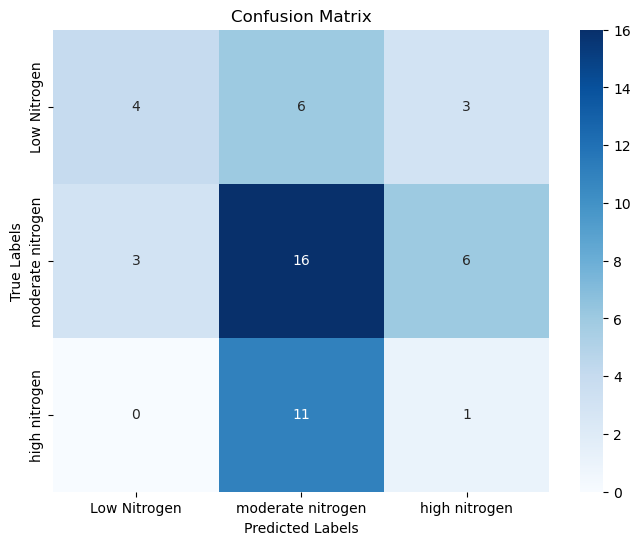

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Low Nitrogen", "moderate nitrogen", "high nitrogen"]  # Example labels

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()